# Ant Colony Optimization for the Traveling Salesman Problem:

Ant Colony Optimization (ACO) is inspired by the foraging behavior of ants and is a powerful heuristic optimization method. In the context of the Traveling Salesman Problem (TSP), the goal is to find the shortest possible route that visits all given cities exactly once and returns to the origin city.

In real-world applications, TSP can be applied in logistics and supply chain optimization, delivery route planning, and other routing problems where efficiency in visiting multiple locations is critical.

# Pseudocode:
Initialize cities and their coordinates
Initialize ACO parameters (alpha, beta, rho, etc.)

For each iteration:
  Initialize pheromone matrix
  
  For each ant:
        Construct a solution:
            Start at a random city
            While all cities are visited:
                Select the next city based on pheromone trail and heuristic info (probabilistic choice)
        Calculate the length of the route for this ant
        Update best solution if necessary
    
  Update pheromones based on all ants' solutions:
        Apply pheromone evaporation
        Add new pheromones based on the inverse of the route lengths (shorter routes deposit more pheromone)
    
  Optional: Check if convergence criteria are met (e.g., no improvement in a number of iterations)

Output the best route and its length


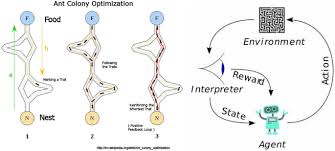

Best route: [1, 0, 3, 4, 2]
Best route length: 12.10654957016754


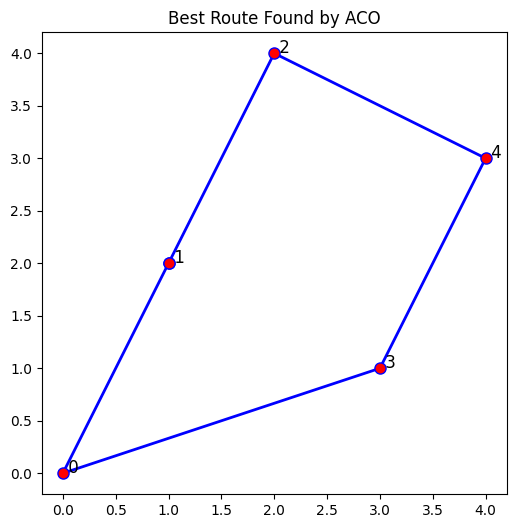

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the coordinates of the cities
cities = [
    (0, 0), (1, 2), (2, 4), (3, 1), (4, 3)  # Example city coordinates
]

# Number of ants
num_ants = 10
# Number of iterations
num_iterations = 100
# Parameters for ACO
alpha = 1.0  # Importance of pheromone
beta = 2.0   # Importance of heuristic (distance)
rho = 0.1    # Evaporation rate of pheromone
tau0 = 1.0   # Initial pheromone level

# Distance function (Euclidean distance between two cities)
def euclidean_distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Function to calculate the total distance of a route
def calculate_route_length(route, cities):
    total_length = 0
    for i in range(len(route) - 1):
        total_length += euclidean_distance(cities[route[i]], cities[route[i + 1]])
    total_length += euclidean_distance(cities[route[-1]], cities[route[0]])  # Return to start
    return total_length

# ACO main function
def ant_colony_optimization(cities):
    num_cities = len(cities)
    # Initialize pheromone matrix
    pheromone = np.ones((num_cities, num_cities)) * tau0
    best_route = None
    best_route_length = float('inf')

    # Main ACO loop
    for iteration in range(num_iterations):
        all_routes = []
        all_route_lengths = []

        # Each ant constructs a solution
        for ant in range(num_ants):
            route = [random.randint(0, num_cities - 1)]  # Start at a random city
            visited = set(route)

            while len(route) < num_cities:
                current_city = route[-1]
                probabilities = []

                # Compute the probability of visiting each unvisited city
                for next_city in range(num_cities):
                    if next_city not in visited:
                        pheromone_val = pheromone[current_city][next_city] ** alpha
                        heuristic_val = (1 / euclidean_distance(cities[current_city], cities[next_city])) ** beta
                        probabilities.append(pheromone_val * heuristic_val)
                    else:
                        probabilities.append(0)

                # Normalize the probabilities
                total_prob = sum(probabilities)
                probabilities = [prob / total_prob for prob in probabilities]

                # Select the next city based on probabilities
                next_city = random.choices(range(num_cities), probabilities)[0]
                route.append(next_city)
                visited.add(next_city)

            # Calculate the length of the route
            route_length = calculate_route_length(route, cities)
            all_routes.append(route)
            all_route_lengths.append(route_length)

            # Update best solution
            if route_length < best_route_length:
                best_route = route
                best_route_length = route_length

        # Update pheromone levels
        pheromone = pheromone * (1 - rho)  # Evaporation
        for ant in range(num_ants):
            for i in range(num_cities - 1):
                pheromone[all_routes[ant][i]][all_routes[ant][i + 1]] += 1.0 / all_route_lengths[ant]
            pheromone[all_routes[ant][-1]][all_routes[ant][0]] += 1.0 / all_route_lengths[ant]  # Return to start

    return best_route, best_route_length

# Run the Ant Colony Optimization
best_route, best_route_length = ant_colony_optimization(cities)

# Output the best solution
print("Best route:", best_route)
print("Best route length:", best_route_length)

# Visualize the best route
best_route_coords = [cities[i] for i in best_route]
best_route_coords.append(cities[best_route[0]])  # Return to start
best_route_coords = np.array(best_route_coords)

plt.figure(figsize=(6, 6))
plt.plot(best_route_coords[:, 0], best_route_coords[:, 1], 'bo-', linewidth=2, markersize=8)
plt.scatter([city[0] for city in cities], [city[1] for city in cities], color='red', zorder=5)
for i, city in enumerate(cities):
    plt.text(city[0], city[1], f' {i}', color='black', fontsize=12)
plt.title("Best Route Found by ACO")
plt.show()
